In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import correlations
from matplotlib import pyplot as plt
%matplotlib inline

# Calculating Steady State Profile $\bar{\rho}$

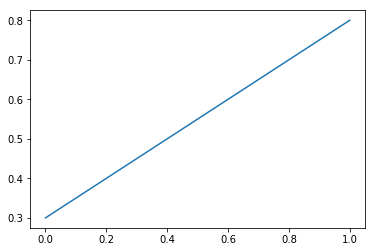

In [2]:
# First example - SSEP (Symmetric Simple Exclusion Process)
D = lambda rho: np.ones_like(rho)
rho0 = 0.3
rho1 = 0.8
x = np.linspace(0, 1, 50)
rho_bar = correlations.rhoBar(D=D, rhoL=rho0, rhoR=rho1, x=x)
plt.figure()
plt.plot(x, rho_bar)

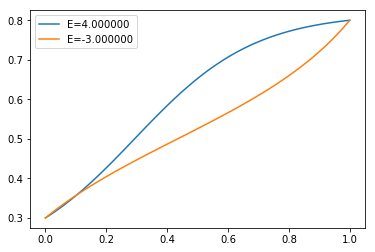

In [6]:
# More interesting - WASEP (Weakly Asymmetric Simple Exclusion Process)
# When there's a bulk field we need to supply Sigma (mobility function)
D = lambda rho: np.ones_like(rho)
sigma = lambda rho: 2*rho*(1-rho)
rho0 = 0.3
rho1 = 0.8
x = np.linspace(0, 1, 50)
E1 = 4
E2 = -3
plt.figure()
rho_bar1 = correlations.rhoBar(D=D, rhoL=rho0, rhoR=rho1, x=x, sigma=sigma, E=E1)
plt.plot(x, rho_bar1, label="E=%f" % E1)
rho_bar2 = correlations.rhoBar(D=D, rhoL=rho0, rhoR=rho1, x=x, sigma=sigma, E=E2)
plt.plot(x, rho_bar2, label="E=%f" % E2)
plt.legend()

# Calculating the two-point correlation function

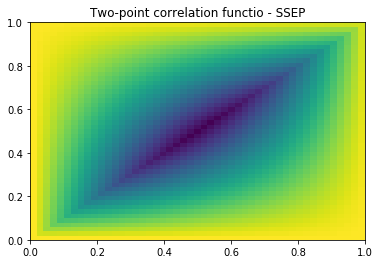

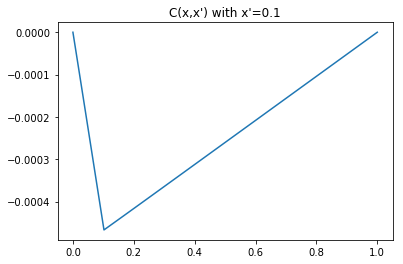

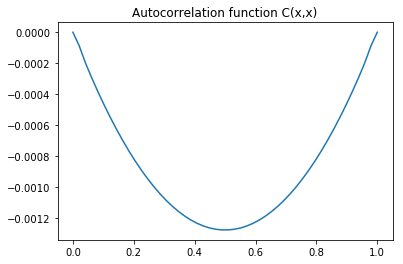

In [19]:
# SSEP
# For calculating the correlation function we need to supply sigma. Since E=0 we don't need sigma'
D = lambda rho: np.ones_like(rho)
sigma = lambda rho: 2*rho*(1-rho)
L = 50
rho0 = 0.3
rho1 = 0.8
x = np.linspace(0, 1, L)
C = correlations.twoPointCorr(D=D, rhoL=rho0, rhoR=rho1, sigma=sigma, x=x)
plt.figure()
plt.pcolormesh(x,x,C)
plt.title("Two-point correlation functio - SSEP")

# Take a cross-section by fixing one of the x's
selected_index = L // 10
plt.figure()
plt.plot(x, C[selected_index, :])
plt.title("C(x,x') with x'={:.2}".format(x[selected_index]))

# Plot the autocorrelation function
autocorr = [C[i,i] for i in range(L)]
plt.figure()
plt.plot(x,autocorr)
plt.title("Autocorrelation function C(x,x)")

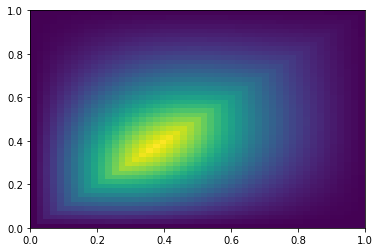

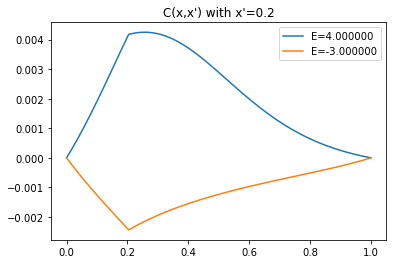

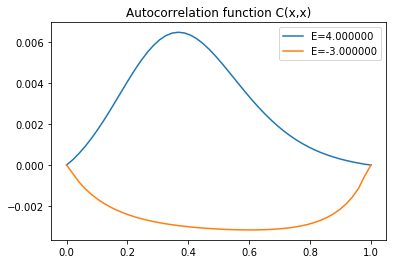

In [17]:
# WASEP
# Since E!=0 here, we need to supply sigma'
D = lambda rho: np.ones_like(rho)
sigma = lambda rho: 2*rho*(1-rho)
sigmaPrime = lambda rho: 2*(1-2*rho)
rho0 = 0.3
rho1 = 0.8
L = 50
x = np.linspace(0, 1, L)
E1 = 4
E2 = -3
C1 = correlations.twoPointCorr(D=D, rhoL=rho0, rhoR=rho1, x=x, sigma=sigma, sigmaPrime=sigmaPrime, E=E1)
C2 = correlations.twoPointCorr(D=D, rhoL=rho0, rhoR=rho1, x=x, sigma=sigma, sigmaPrime=sigmaPrime, E=E2)

plt.figure()
plt.pcolormesh(x,x,C1)

# Take cross-sections by fixing one of the x's
selected_index = L // 5
plt.figure()
plt.plot(x, C1[selected_index, :], label="E=%f" % E1)
plt.plot(x, C2[selected_index, :], label="E=%f" % E2)
plt.title("C(x,x') with x'={:.2}".format(x[selected_index]))
plt.legend()

# Plot the autocorrelation functions
autocorr1 = [C1[i,i] for i in range(L)]
autocorr2 = [C2[i,i] for i in range(L)]
plt.figure()
plt.plot(x,autocorr1, label="E=%f" % E1)
plt.plot(x,autocorr2, label="E=%f" % E2)
plt.title("Autocorrelation function C(x,x)")
plt.legend()

# The KLS model

The KLS model is a 1-dimensional model for ionic channels devised by Katz, Lebowitz, Spohn [1]. The hydrodynamic coefficients of the model are not trivial but they were calculated in [2].

Refs:
<ol>
  <li>Katz, Sheldon, Joel L. Lebowitz, and Herbert Spohn. "Nonequilibrium steady states of stochastic lattice gas models of fast ionic conductors." Journal of statistical physics 34.3 (1984): 497-537.</li>
  <li>Baek, Yongjoo, Yariv Kafri, and Vivien Lecomte. "Dynamical symmetry breaking and phase transitions in driven diffusive systems." Physical Review Letters 118.3 (2017): 030604.</li>
</ol>


In [18]:
import kls

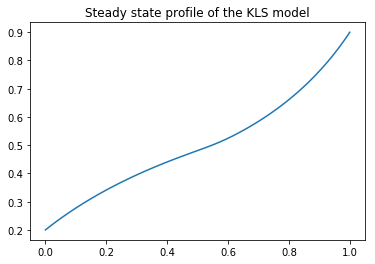

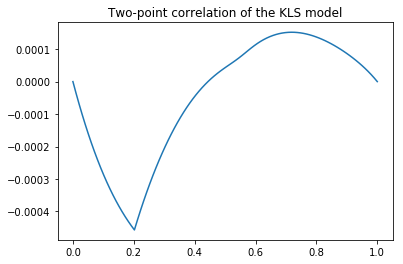

In [25]:
# parameters
delta = 0.2
epsilon = 0.995

D = lambda rho: kls.kls_D(rho, epsilon=epsilon, delta=delta)
sigma = lambda rho: kls.kls_sigma(rho, epsilon=epsilon, delta=delta)
rhoL = 0.2
rhoR = 0.9
L = 100
x = np.linspace(0, 1, L)

rho_bar = correlations.rhoBar(D=D, rhoL=rhoL, rhoR=rhoR, x=x)
plt.figure()
plt.plot(x, rho_bar)
plt.title("Steady state profile of the KLS model")

C = correlations.twoPointCorr(D=D, sigma=sigma, rhoL=rhoL, rhoR=rhoR, x=x)

selected_index = L // 10
plt.figure()
plt.plot(x, C[selected_index, :])
plt.title("C(x,x') with x'={:.2}".format(x[selected_index]))

# Plot the autocorrelation function
autocorr = [C[i,i] for i in range(L)]
plt.figure()
plt.plot(x,autocorr)
plt.title("Autocorrelation function C(x,x)")